In [7]:
import numpy as ny
from turtle import color
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys

plt.style.use('dark_background')
print(sys.version)

3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]


In [8]:
r1 = pd.read_csv('1329-pre.csv', usecols=['nukl', 'mass', 'activ', 'count_av', 'aver_coeff'])
r2 = pd.read_csv('1329-rez.csv')
r1 = r1.rename(columns= {'nukl':'nucl', 'activ':'act', 'count_av':'aver', 'aver_coeff':'eff'})
rez = pd.concat([r1, r2], ignore_index=True)
rez = rez.sort_values(by=['nucl', 'mass'])
rez = rez[rez['nucl'] != 'K_02']
rez.to_csv('1329.csv')

<AxesSubplot: xlabel='nucl', ylabel='eff'>

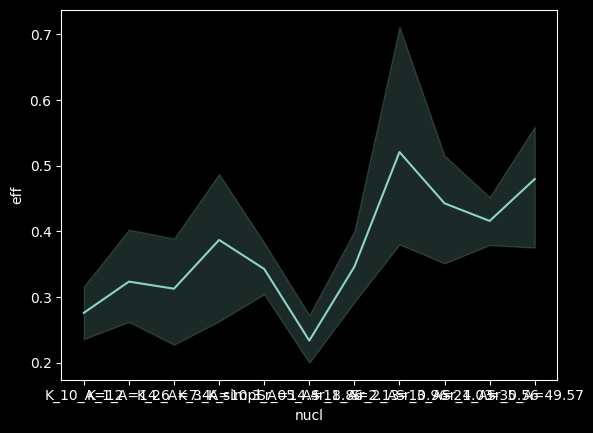

In [9]:
sns.lineplot(data=rez, x='nucl', y='eff' )

<AxesSubplot: xlabel='mass', ylabel='eff'>

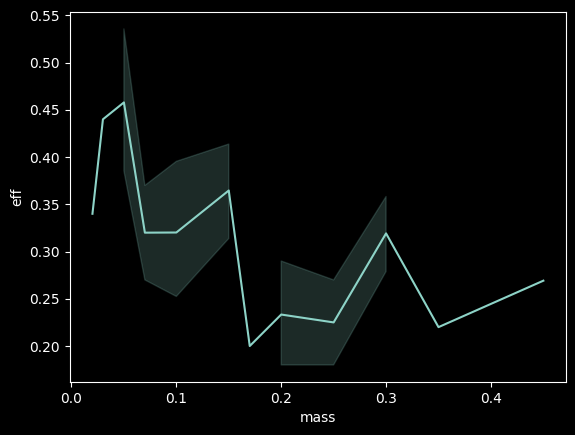

In [10]:
sns.lineplot(data=rez, x='mass', y='eff' )

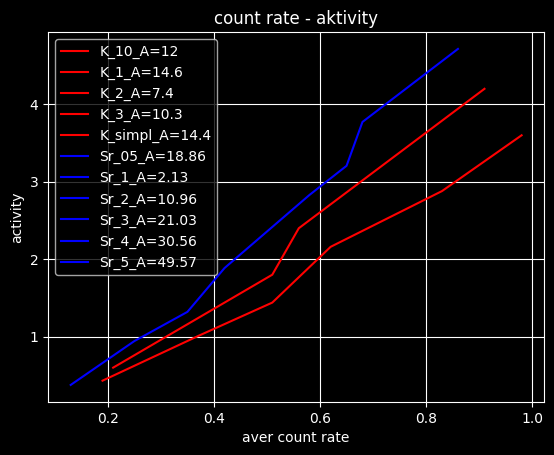

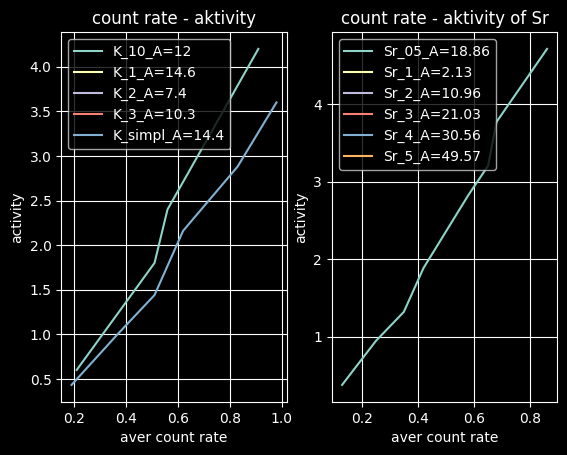

In [11]:
# mapping
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.set(
    title = 'count rate - aktivity',
    xlabel = 'aver count rate',
    ylabel = 'activity',
)
ax1.grid(True)

for i in rez['nucl'].unique():
    if 'K' in i: col = 'r'
    else: col = 'b'
    plt.plot(rez[rez['nucl'] == i]['aver'], rez[rez['nucl'] == i]['act'], '-' + col,  label = i)
ax1.legend() 

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.set(
    title = 'count rate - aktivity',
    xlabel = 'aver count rate',
    ylabel = 'activity',
)
ax1.grid(True)

for i in rez['nucl'].unique():
    if 'K' in i: plt.plot(rez[rez['nucl'] == i]['aver'], rez[rez['nucl'] == i]['act'], '-',  label = i)
ax1.legend() 

ax2 = fig.add_subplot(122)
ax2.set(
    title = 'count rate - aktivity of Sr',
    xlabel = 'aver count rate',
    ylabel = 'activity',
)
ax2.grid(True)   
for i in rez['nucl'].unique():
    if 'Sr' in i: plt.plot(rez[rez['nucl'] == i]['aver'], rez[rez['nucl'] == i]['act'], '-',  label = i)
ax2.legend() 




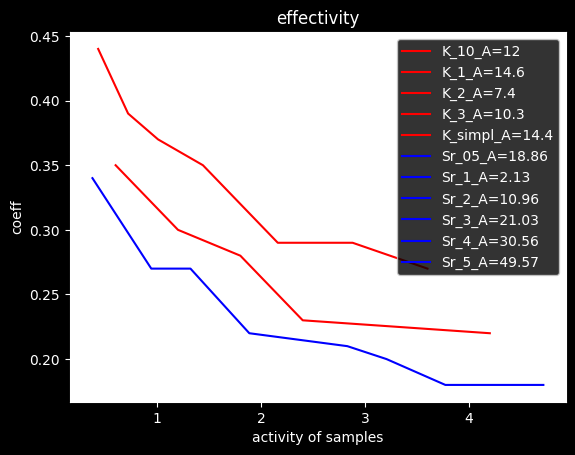

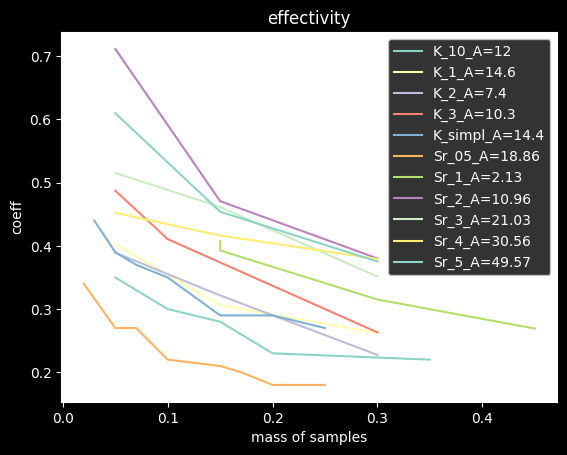

In [12]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.set(
    facecolor = 'white',
    title = 'effectivity',
    #ylim = [0, 200],
    xlabel = 'activity of samples',
    ylabel = 'coeff',
)
ax3.grid(True)


for i in rez['nucl'].unique():
    if 'K' in i: col = 'r'
    else: col = 'b'
    plt.plot(rez[rez['nucl'] == i]['act'], rez[rez['nucl'] == i]['eff'], '-' + col, label = i)
      
ax3.legend()

fig = plt.figure()
ax4 = fig.add_subplot(111)
ax4.set(
    facecolor = 'white',
    title = 'effectivity',
    #ylim = [0, 200],
    xlabel = 'mass of samples',
    ylabel = 'coeff',
)
ax4.grid(True)

for i in rez['nucl'].unique():
    if 'K' in i: col = 'r'
    else: col = 'b'
    plt.plot(rez[rez['nucl'] == i]['mass'], rez[rez['nucl'] == i]['eff'], '-', label = i)
ax4.legend()